___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weather = pd.read_csv("weather.csv")

In [2]:
import pandas as pd
import numpy as np
ri = pd.read_csv("police.csv", low_memory=False)
ri.drop(["county_name", "state"], axis = 1, inplace = True)
ri.dropna(inplace = True, subset = ["driver_gender"])
ri["is_arrested"] = ri["is_arrested"].astype("bool")
ri["combined"] = ri["stop_date"] + " " + ri["stop_time"]
ri["stop_datetime"] = ri["combined"].astype("datetime64")
ri.set_index(["stop_datetime"], inplace = True)
ri["search_conducted"] = ri.search_conducted.astype('bool')

In [3]:
weather.isnull().sum()/weather.isnull().shape[0]*100

STATION     0.000000
DATE        0.000000
AWND       49.925206
TAVG       84.829220
TMAX        0.211917
TMIN        0.324109
WT01       77.848417
WT02       97.245076
WT03       97.170282
WT04       98.516579
WT05       95.512341
WT06       99.688357
WT07       99.015208
WT08       94.963849
WT09       99.139865
WT10       99.975069
WT11       99.962603
WT13       85.352780
WT14       92.832211
WT15       99.925206
WT16       83.470456
WT17       99.850411
WT18       95.699327
WT19       99.950137
WT21       99.775617
WT22       99.601097
dtype: float64

In [4]:
weather.shape

(8022, 26)

In [5]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

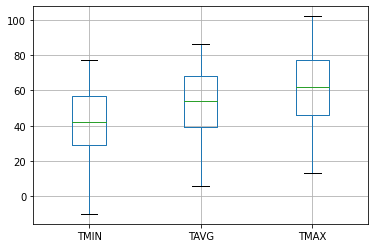

In [7]:
weather.boxplot(column=["TMIN", "TAVG", "TMAX"])

<AxesSubplot:>

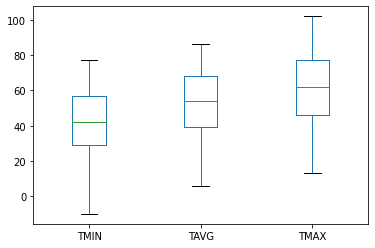

In [8]:
#Alternative:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [9]:
weather["TDIFF"] = weather.TMAX - weather.TMIN

In [10]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

<AxesSubplot:>

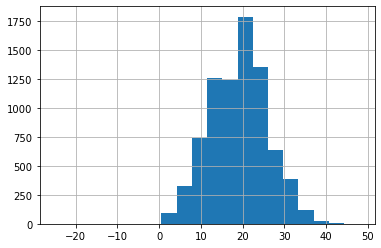

In [11]:
weather.TDIFF.hist(bins = 20)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [12]:
WT = weather.loc[:, "WT01":"WT22"]

In [13]:
bad_conditions = WT.sum(axis = 1)

In [14]:
bad_conditions

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

<AxesSubplot:>

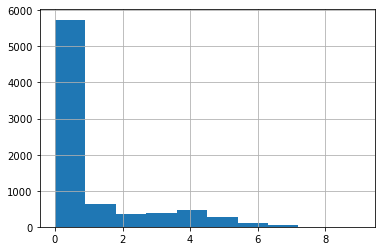

In [15]:
bad_conditions.hist()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [16]:
bad_conditions.sort_index(inplace = True)

In [17]:
bad_conditions

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

In [18]:
bad_conditions.unique()

array([0., 1., 2., 3., 4., 9., 6., 8., 5., 7.])

In [19]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [20]:
ratings = bad_conditions.map(mapping)

In [21]:
bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
dtype: int64

In [22]:
ratings.unique()

array(['good', 'bad', 'worse'], dtype=object)

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [23]:
cats = ["worse", "bad", "good"]

In [24]:
catories = pd.CategoricalDtype(cats, ordered = True)

In [25]:
ratings = ratings.astype(catories)

In [26]:
weather["rating"] = ratings

In [27]:
ratings.value_counts(dropna = False)

good     5738
bad      1852
worse     432
dtype: int64

In [28]:
ratings

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Length: 8022, dtype: category
Categories (3, object): ['worse' < 'bad' < 'good']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [29]:
ri.reset_index(inplace = True)

In [30]:
weather_rating = weather[["DATE", "rating"]]

In [31]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [32]:
ri.shape

(480584, 26)

In [33]:
weather_rating.shape

(8022, 2)

In [34]:
ri_weather = pd.merge(ri, weather_rating, left_on = "stop_date", right_on = "DATE", how="left")

In [35]:
ri_weather.shape

(959952, 28)

In [36]:
ri_weather.set_index("stop_datetime", inplace = True)

In [37]:
ri_weather.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55,2005-01-04,good


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [38]:
ri_weather.is_arrested.mean()

0.0345715202426788

In [39]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
worse    0.039360
bad      0.035226
good     0.034080
Name: is_arrested, dtype: float64

In [40]:
ri_weather.groupby(["violation", "rating"])["is_arrested"].mean()

violation            rating
Equipment            worse     0.094373
                     bad       0.059581
                     good      0.059125
Moving violation     worse     0.062249
                     bad       0.058081
                     good      0.056805
Other                worse     0.058704
                     bad       0.084950
                     good      0.080682
Registration/plates  worse     0.098673
                     bad       0.092634
                     good      0.083238
Seat belt            worse     0.000000
                     bad       0.028795
                     good      0.026339
Speeding             worse     0.016600
                     bad       0.013348
                     good      0.013494
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [41]:
arrest_rate = ri_weather.groupby(["violation", "rating"])["is_arrested"].mean()

In [42]:
arrest_rate

violation            rating
Equipment            worse     0.094373
                     bad       0.059581
                     good      0.059125
Moving violation     worse     0.062249
                     bad       0.058081
                     good      0.056805
Other                worse     0.058704
                     bad       0.084950
                     good      0.080682
Registration/plates  worse     0.098673
                     bad       0.092634
                     good      0.083238
Seat belt            worse     0.000000
                     bad       0.028795
                     good      0.026339
Speeding             worse     0.016600
                     bad       0.013348
                     good      0.013494
Name: is_arrested, dtype: float64

In [43]:
arrest_rate["Moving violation"]["bad"]

0.0580814717477004

In [44]:
#Alternative:
arrest_rate.loc["Moving violation", "bad"]

0.0580814717477004

In [45]:
arrest_rate["Speeding"]

rating
worse    0.016600
bad      0.013348
good     0.013494
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [46]:
unstacked = arrest_rate.unstack(-1)
unstacked

rating,worse,bad,good
violation,,,
Equipment,0.094373,0.059581,0.059125
Moving violation,0.062249,0.058081,0.056805
Other,0.058704,0.084950,0.080682
Registration/plates,0.098673,0.092634,0.083238
Seat belt,0.000000,0.028795,0.026339
Speeding,0.016600,0.013348,0.013494


In [47]:
ri_weather

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55,2005-01-04,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200,M,1980.0,35.0,...,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08,2015-12-31,bad
2015-12-31 23:44:00,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900,M,1984.0,31.0,...,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44,2015-12-31,good
2015-12-31 23:44:00,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900,M,1984.0,31.0,...,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44,2015-12-31,bad


In [48]:
pd.pivot_table(ri_weather, index = "violation", columns = "rating", values="is_arrested")

rating,worse,bad,good
violation,,,
Equipment,0.094373,0.059581,0.059125
Moving violation,0.062249,0.058081,0.056805
Other,0.058704,0.084950,0.080682
Registration/plates,0.098673,0.092634,0.083238
Seat belt,0.000000,0.028795,0.026339
Speeding,0.016600,0.013348,0.013494
